<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

Simon Gauthier, Laurent Emond, Thomas Charland et Anthony Drouin

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `tds2Danimation_hXX.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leurs trajectoires ballistiques. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude du mouvement des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `tds2Danimation_hXX.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# 1<sup>re</sup> partie - Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [1]:
%run tds2Danimation_h25.py
# ou
#%run tds3Dsim_h.py #si disponible : script sans la lente animation Vpython qui est en développement à la session h25!
# Remplacez "XX" par les deux derniers chiffres de l'année de votre session.
# N'hésitez pas à exécuter l'animation 2D ou la simulation 3D à l'extérieur du _Notebook_. Cette cellule vise à préciser que les questions qui suivent se basent sur ces scripts et doivent mener aux mêmes répomses autant en 2D qu'en 3D.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour calculer la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ en écrivant le code nécessaire dans la cellule qui suit. 

Pour faire ce calcul, nous allons extraire la variable $p$ défini dans le script `tds2Danimation_hXX.py` qui est une liste de vecteurs de quantité de mouvement de toutes les sphères. Il suffit maintenant d'itérer sur cette list pour calculer la norme. Ensuite, il suffit de faire la moyenne de ces normes au carré.

In [2]:
import numpy as np

array_p = []

for v in p:
    array_p.append(np.array([v.x, v.y, v.z]))

array_p = np.array(array_p)

momentum_all_particles = []

for v in array_p:
    momentum = v[0]**2 + v[1]**2 + v[2]**2
    momentum_all_particles.append(momentum)

average_momentum = np.mean(momentum_all_particles)

print(f"La quantité de mouvement carrée moyenne des particules est de {average_momentum} kg.m/s.")

La quantité de mouvement carrée moyenne des particules est de 5.6e-47 kg.m/s.



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ en répartissant l'énergie également sur chaque degré de liberté ici en translation seulement d'où, au total pour $\text{DIM}=1,2\text{ ou } 3$ dimensions d'espace réel,
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=\text{DIM}\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [3]:
#Définition des paramètres selon ceux de la simulation
dim = 2
k_b = 1.4E-23
m = 4E-3/6E23

gas_temperature = average_momentum / (m*dim*k_b)

print(f"La température du gaz est de {gas_temperature:.2f}K à la fin de la simulation.")

La température du gaz est de 300.00K à la fin de la simulation.


**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [4]:
#Intégrée dans la boucle principale, la fonction suivra la progression d'une particule
#Lorsqu'une collision a lieu, les données accumulatedTime et accumulatedDistance seront sauvées dans une followParticuleList (variable globale)
#Cette variable globale sera celle qui persistera après la simulation complète

followParticuleList = []
def followParticule(hitlist, accumulatedDistanceX, accumulatedDistanceY, accumulatedDistanceZ, accumulatedTime, previousCollision):
    particuleNumber = 1 #numéro de la particule que nous suivrons
    vitesseParticule = p[particuleNumber]/mass
    
    accumulatedTime += dt
    accumulatedDistanceX += vitesseParticule.x*dt
    accumulatedDistanceY += vitesseParticule.y*dt
    accumulatedDistanceZ += vitesseParticule.z*dt

    hit = False
    for ij in hitlist:
        if ij[0] == particuleNumber or ij[1] == particuleNumber:
            hit = True
            currentCollision = ij
    
    if hit:
        if previousCollision != currentCollision: #avoids repetition of same collision
            followParticuleList.append([accumulatedDistanceX, accumulatedDistanceY, accumulatedDistanceZ, accumulatedTime])
            previousCollision = currentCollision
        return 0, 0, previousCollision
    else:
        return accumulatedDistanceX, accumulatedDistanceY, accumulatedDistanceZ, accumulatedTime, previousCollision

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [5]:
from modifiedQuestion3_tds2Danimation_h25 import followParticuleList

l_tot = 0
for ij in followParticuleList:
    l_tot += np.sqrt(ij[0]**2 + ij[1]**2 + ij[2]**2)

t_tot = 0
for ij in followParticuleList:
    t_tot += ij[3]

l_moy = l_tot/len(followParticuleList)
t_moy = t_tot/len(followParticuleList)

print(f"Le libre parcours moyen est de {l_moy} m")
print(f"Le temps de collision est de {t_moy} s")
print(f"Il y a eu {len(followParticuleList)} collisions lors de l'intervalle simulée! ({t_tot}s)")

<IPython.core.display.Javascript object>

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [10:49<00:00, 46.16it/s]


Le libre parcours moyen est de 0.0675094879274497 m
Le temps de collision est de 8.253650793650796e-05 s
Il y a eu 315 collisions lors de l'intervalle simulée! (0.025999000000000005s)


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [12]:
vitesseEntreCollisionsList = []
for ij in followParticuleList:
    t = ij[3]
    v_x = ij[0]/t
    v_y = ij[1]/t
    v_z = ij[2]/t
    vitesseEntreCollisionsList.append([v_x, v_y, v_z])

#Section suivante seulement pour debugging
v_average = [0, 0, 0]
number_of_collision = len(followParticuleList)
for v in vitesseEntreCollisionsList:
    v_x, v_y, v_z = v
    v_average[0] += v_x / number_of_collision
    v_average[1] += v_y / number_of_collision
    v_average[2] += v_z / number_of_collision

#Note: il serait possible de simplement calculer v_moy = l_moy / t_moy, mais l'approche qui suit est plus rigoureuse
#vitessePondered = 0
#for i in range(0, len(followParticuleList)):
#    vitessePondered += vitesseEntreCollisionsList[i]*followParticuleList[i][3]
#vitessePondered = vitessePondered/t_tot


print(f"La vitesse moyenne de la particule est de {v_average[0]:.2f}x + {v_average[1]:.2f}y + {v_average[2]:.2f}z m/s")

La vitesse moyenne de la particule est de -18.37x + 1.66y + 0.00z m/s


**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

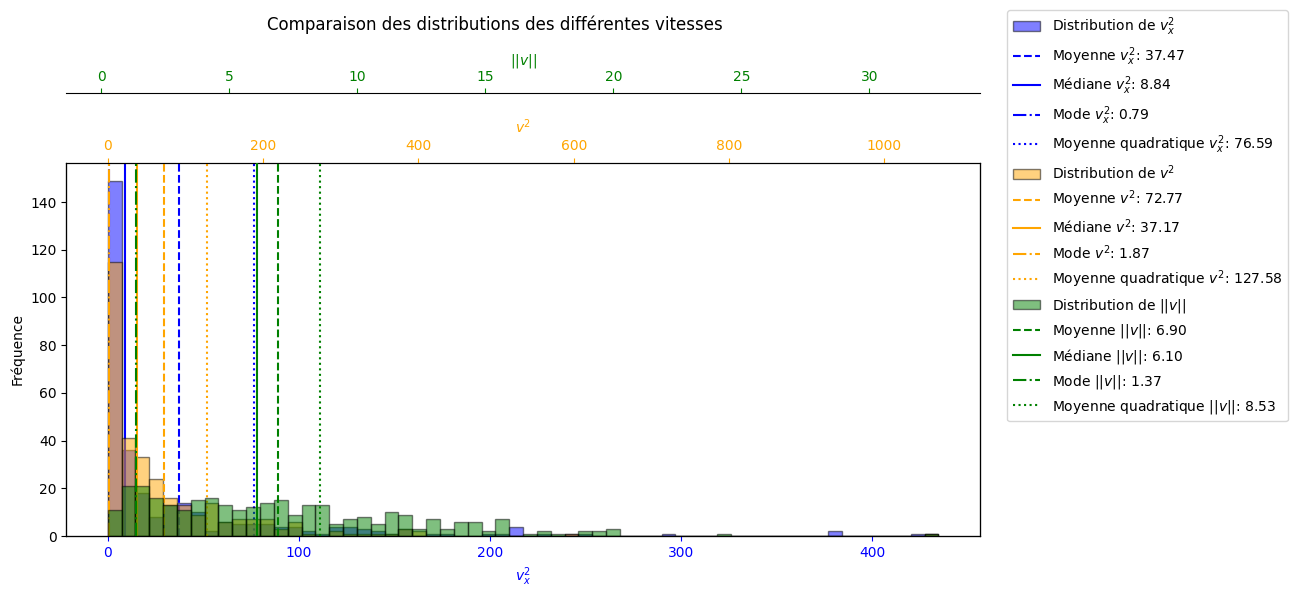

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

carres_x = []
carres_vitesse = []
normes_vitesse = []

for ij in followParticuleList:
    dt = ij[3]
    dx = ij[0]
    dy = ij[1]
    dz = ij[2]
    carre_x = dx**2/dt
    carre_vitesse = (dx**2 + dy**2 + dz**2)/dt
    norme_vitesse = np.sqrt(carre_vitesse)

    carres_x.append(carre_x)
    carres_vitesse.append(carre_vitesse)
    normes_vitesse.append(norme_vitesse)

carres_x = np.array(carres_x)
carres_vitesse = np.array(carres_vitesse)
normes_vitesse = np.array(normes_vitesse)

# Calcul des statistiques
stats_dict = {}
labels = ["$v_x^2$", "$v^2$", "$||v||$"]
data_list = [carres_x, carres_vitesse, normes_vitesse]
colors = ['blue', 'orange', 'green']

for label, data in zip(labels, data_list):
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True)[0][0]  # Extraction de la valeur du mode
    rms = np.sqrt(np.mean(data**2))  # Moyenne quadratique
    stats_dict[label] = (mean, median, mode, rms)

# Création du graphique avec plusieurs axes X
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax3.spines['top'].set_position(('outward', 50))  # Décalage du troisième axe X

axes = [ax1, ax2, ax3]

for ax_x, data, label, color in zip(axes, data_list, labels, colors):
    ax_x.hist(data, bins=60, alpha=0.5, color=color, edgecolor='black', label=f"Distribution de {label}")
    mean, median, mode, rms = stats_dict[label]
    
    # Ajout des lignes verticales pour les statistiques
    ax_x.axvline(mean, color=color, linestyle='--', label=f"Moyenne {label}: {mean:.2f}")
    ax_x.axvline(median, color=color, linestyle='-', label=f"Médiane {label}: {median:.2f}")
    ax_x.axvline(mode, color=color, linestyle='-.', label=f"Mode {label}: {mode:.2f}")
    ax_x.axvline(rms, color=color, linestyle=':', label=f"Moyenne quadratique {label}: {rms:.2f}")
    
    ax_x.set_xlabel(f"{label}", color=color)
    ax_x.tick_params(axis='x', colors=color)

ax1.set_ylabel("Fréquence")
fig.suptitle("Comparaison des distributions des différentes vitesses")
fig.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
fig.tight_layout()
plt.show()




**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

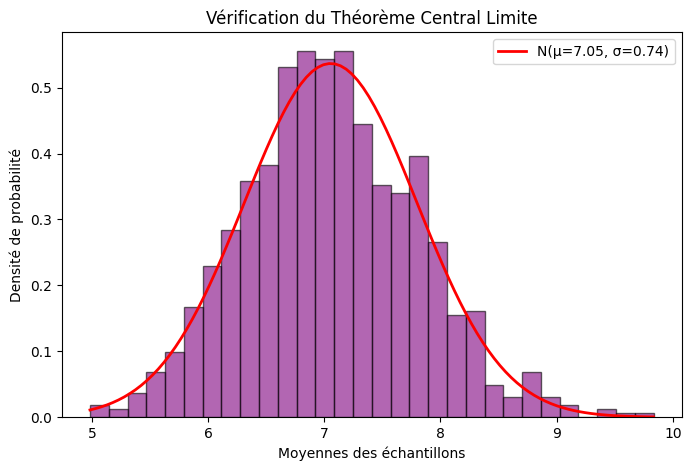

In [15]:
### (a)
sample_means = [np.mean(np.random.choice(normes_vitesse, size=50, replace=True)) for _ in range(1000)]
plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='purple', edgecolor='black')
mu, sigma = np.mean(sample_means), np.std(sample_means)
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2, label=f"N(μ={mu:.2f}, σ={sigma:.2f})")
plt.title("Vérification du Théorème Central Limite")
plt.xlabel("Moyennes des échantillons")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()

#

### b)

On prouve que le système est ergodique est démontrant que les moyennes temporelles sont égales (ou proche) aux moyennes d'ensemble.

Considérons par exemple l'énergie cinétique $E_{cin}$ que nous pouvons trouver à partir de la simulation numérique et à partir de la distribution de Maxwell-Boltzmann, ce qui sera notre moyenne d'ensemble.

**Moyenne statistique**

$$\langle E_{cin}\rangle_t = \frac{1}{2}m\langle v^2\rangle$$

On trouve $\langle v^2\rangle$ avec

$$\langle v^2\rangle = \frac{1}{N}\sum_{i=1}^{N}v_i^2$$

**Moyenne d'ensemble**

On part de la distribution de Maxwell-Boltzmann pour l'énergie cinétique. À partir de la question 2, et en considérant une dimension de deux $\text{DIM}=2$, on obtient

$$\langle E_{cin} \rangle_{\mu} = k_b T$$

où $T$ est la température et celle-ci est connue. En effet, dans le script fourni dans le cadre du devoir, nous avons posé que $T=300$ K.

Maintenant, il suffit de confirmer que 

$$\langle E_{cin}\rangle_t \approx \langle E_{cin}\rangle_{\mu}$$

Pour ce faire, on extraire les valeurs $v_i^2$ de la simulation pour calculer la moyenne et on utilise la fonction `numpy.isclose()` pour s'assurer que les deux moyennes sont approximativement égale. Si cette fonction retourne `True`, on peut conclure que le système est ergodique.

In [22]:
## #(b) à confirmer mettons
norme_v_squared = []
for ij in followParticuleList:
    t = ij[3]
    v_x = ij[0]/t
    v_y = ij[1]/t
    v_z = ij[2]/t
    norme_v_squared.append(v_x**2 + v_y**2 + v_z**2)

norme_v_squared = np.array(norme_v_squared) / len(norme_v_squared)

k_b = 1.4E-23
m = 4E-3/6E23

v_squared_average_experimental = np.sum(norme_v_squared)
kinetics_energy_average_experimental = (1/2) * m * v_squared_average_experimental

T = 300

kinetics_energy_analytical = k_b * 300

print(np.isclose(kinetics_energy_analytical, kinetics_energy_average_experimental))


True


# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.